Mobilenet

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import datetime

# Dataset Paths
train_dir = "/content/drive/MyDrive/Capstone Project/training"
valid_dir = "/content/drive/MyDrive/Capstone Project/testing"

image_height, image_width = 224, 224  # MobileNet expects 224x224 input size
BATCH_SIZE = 32
EPOCHS = 10

# Image Data Generators
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1
)

train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(image_height, image_width),
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    class_mode="binary",  # Binary classification
    shuffle=True,
    seed=1
)

valid_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

valid_generator = valid_datagen.flow_from_directory(
    directory=valid_dir,
    target_size=(image_height, image_width),
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    class_mode="binary",  # Binary classification
    shuffle=True,
    seed=7
)

train_num = train_generator.samples
valid_num = valid_generator.samples

# MobileNet Model
base_model = MobileNet(
    input_shape=(image_height, image_width, 3),
    include_top=False,
    weights="imagenet"  # Pre-trained weights
)

model = Sequential([
    base_model,                      # Pre-trained MobileNet base
    GlobalAveragePooling2D(),        # Converts feature maps to 1D feature vector
    Dense(256, activation='relu'),   # New hidden layer with 256 neurons
    Dropout(0.3),                    # Dropout to prevent overfitting
    Dense(128, activation='relu'),   # Existing hidden layer
    Dense(64, activation='relu'),    # New hidden layer with 64 neurons
    Dense(1, activation='sigmoid')   # Sigmoid for binary classification
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=train_num // BATCH_SIZE,
    validation_data=valid_generator,
    validation_steps=valid_num // BATCH_SIZE,
    verbose=1
)

model.summary()


Found 469 images belonging to 2 classes.
Found 222 images belonging to 2 classes.
Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 73s 3s/step - accuracy: 0.7630 - loss: 0.4676 - val_accuracy: 0.7448 - val_loss: 2.9948
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 279ms/step - accuracy: 0.9375 - loss: 0.2561 - val_accuracy: 0.7344 - val_loss: 2.8021
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.9428 - loss: 0.1734 - val_accuracy: 0.7448 - val_loss: 2.8215
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 296ms/step - accuracy: 0.9375 - loss: 0.1656 - val_accuracy: 0.7135 - val_loss: 3.0603
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.9216 - loss: 0.1759 - val_accuracy: 0.6406 - val_loss: 5.4302
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.9688 - loss: 0.1149 - val_accuracy: 0.6719 - val_loss: 5.2382
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.9836 - loss: 0.0503 - val_accuracy: 0.7240 - val_loss: 4.2176
Epoch 8/10
14/14 ━━━━━━━━━━━━━

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional)      │ (None, 7, 7, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,553,669 (40.26 MB)

 Trainable params: 3,510,593 (13.39 MB)

 Non-trainable params: 21,888 (85.50 KB)

 Optimizer params: 7,021,188 (26.78 MB)

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import datetime

# Dataset Paths
train_dir = "/content/drive/MyDrive/Capstone Project/training"
valid_dir = "/content/drive/MyDrive/Capstone Project/testing"

# Image dimensions and parameters
image_height, image_width = 224, 224
BATCH_SIZE = 32
EPOCHS = 10

# Image Data Generators (with augmentation for training)
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1
)

valid_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Data Generators (no warning version)
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(image_height, image_width),
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=True,
    seed=1
)

valid_generator = valid_datagen.flow_from_directory(
    directory=valid_dir,
    target_size=(image_height, image_width),
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=True,
    seed=7
)

train_num = train_generator.samples
valid_num = valid_generator.samples

# Load MobileNet base model
base_model = MobileNet(
    input_shape=(image_height, image_width, 3),
    include_top=False,
    weights="imagenet"
)

# Freeze the base model layers (optional, for transfer learning)
for layer in base_model.layers:
    layer.trainable = False

# Build the model
model = Sequential([
    base_model,                      # Pre-trained MobileNet
    GlobalAveragePooling2D(),        # Global average pooling
    Dense(256, activation='relu'),   # First dense layer with 256 neurons
    Dropout(0.3),                    # Dropout to prevent overfitting
    Dense(128, activation='relu'),   # Second dense layer with 128 neurons
    Dense(64, activation='relu'),    # Third dense layer with 64 neurons
    Dense(1, activation='sigmoid')   # Output for binary classification
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Set up TensorBoard callback for better monitoring (optional)
log_dir = "/content/drive/MyDrive/Capstone Project/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model (without warnings by setting workers and use_multiprocessing)
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=train_num // BATCH_SIZE,
    validation_data=valid_generator,
    validation_steps=valid_num // BATCH_SIZE,
    callbacks=[tensorboard_callback],  # For TensorBoard visualization
    # workers=1,                         # Avoid multiprocessing-related warnings
    # use_multiprocessing=False          # Ensure compatibility
)

# Display the model summary
model.summary()


Found 469 images belonging to 2 classes.
Found 222 images belonging to 2 classes.
Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.7192 - loss: 0.4890 - val_accuracy: 0.9219 - val_loss: 0.1519
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 260ms/step - accuracy: 0.9688 - loss: 0.1521 - val_accuracy: 0.9427 - val_loss: 0.1435
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.9525 - loss: 0.1678 - val_accuracy: 0.9427 - val_loss: 0.1613
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 292ms/step - accuracy: 0.9375 - loss: 0.1311 - val_accuracy: 0.9323 - val_loss: 0.1885
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.9579 - loss: 0.1176 - val_accuracy: 0.9531 - val_loss: 0.1073
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 340ms/step - accuracy: 1.0000 - loss: 0.0396 - val_accuracy: 0.9375 - val_loss: 0.1660
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.9428 - loss: 0.1319 - val_accuracy: 0.9427 - val_loss: 0.1328
Epoch 8/10
14/14 ━━━━━━━━━━━━━

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional)      │ (None, 7, 7, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,139,717 (15.79 MB)

 Trainable params: 303,617 (1.16 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

 Optimizer params: 607,236 (2.32 MB)

Heatmap

7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 782ms/step


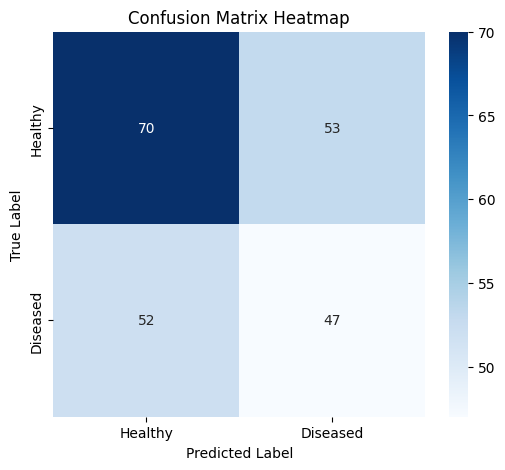

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get true labels and predictions
y_true = valid_generator.classes  # True labels
y_pred = model.predict(valid_generator)  # Predicted probabilities
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert to binary labels

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Healthy', 'Diseased'],
            yticklabels=['Healthy', 'Diseased'])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [ ]:
# Save the entire model
model.save("mobilenet_cucumber_classifier_V1.h5")

tesing part of whether disease present or not

Disease Name Identification

In [ ]:
# Import necessary libraries
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard
import tensorflow as tf

# Define image dimensions and other parameters
image_height, image_width = 224, 224  # Resize images to 227x227 for MobileNet
BATCH_SIZE = 32
num_classes = 6  # Number of classes for classification

# Directories for training and validation data
train_dir = "/content/drive/MyDrive/Capstone Project/train"
valid_dir = "/content/drive/MyDrive/Capstone Project/test"

# Data preprocessing with ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values to [0, 1]
    rotation_range=10,  # Random rotation
    width_shift_range=0.1,  # Random horizontal shift
    height_shift_range=0.1,  # Random vertical shift
    shear_range=0.1,  # Random shear transformation
    zoom_range=0.1  # Random zoom transformation
)

valid_datagen = ImageDataGenerator(rescale=1.0 / 255.0)  # Only rescale for validation data

# Data generators for loading images
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(image_height, image_width),
    batch_size=BATCH_SIZE,
    class_mode="categorical"  # Multi-class classification
)

valid_generator = valid_datagen.flow_from_directory(
    directory=valid_dir,
    target_size=(image_height, image_width),
    batch_size=BATCH_SIZE,
    class_mode="categorical"  # Multi-class classification
)

# Initialize MobileNet model without the top classification layers (base model)
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

# Add custom layers on top for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global Average Pooling to reduce the dimensionality
x = Dense(128, activation='relu')(x)  # Dense layer for feature learning
predictions = Dense(num_classes, activation='softmax')(x)  # Output layer with 'num_classes' categories

# Final model combining base MobileNet with custom layers
model_mobilenet = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the pre-trained MobileNet (do not train these layers)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with Adam optimizer and categorical crossentropy loss (for multi-class classification)
model_mobilenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define the number of epochs for training
EPOCHS = 10

# # Set up TensorBoard for logging and visualization (optional)
# log_dir = "logs"
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# Train the model
history = model_mobilenet.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=EPOCHS,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_steps=valid_generator.samples // BATCH_SIZE,
    # callbacks=[tensorboard_callback]  # TensorBoard callback to monitor training
)

# Save the trained model
model_mobilenet.save("mobilenet_disease_detection.h5")

# Print model summary
model_mobilenet.summary()

Found 960 images belonging to 6 classes.
Found 127 images belonging to 6 classes.
Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.4355 - loss: 1.5347 - val_accuracy: 0.5938 - val_loss: 1.4293
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 27s 919ms/step - accuracy: 0.7457 - loss: 0.7341 - val_accuracy: 0.6979 - val_loss: 0.8513
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 38s 819ms/step - accuracy: 0.8139 - loss: 0.5456 - val_accuracy: 0.7604 - val_loss: 0.6917
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.8600 - loss: 0.4489 - val_accuracy: 0.8438 - val_loss: 0.6062
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 65s 798ms/step - accuracy: 0.8840 - loss: 0.3972 - val_accuracy: 0.8542 - val_loss: 0.5064
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 23s 766ms/step - accuracy: 0.9010 - loss: 0.3079 - val_accuracy: 0.8750 - val_loss: 0.4516
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 42s 808ms/step - accuracy: 0.9095 - loss: 0.2774 - val_accuracy: 0.8438 - val_loss: 0.4877
Epoch 8/10
30/30 ━━━━

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,624,788 (13.83 MB)

 Trainable params: 131,974 (515.52 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

 Optimizer params: 263,950 (1.01 MB)

In [ ]:
model_mobilenet.summary()
model_mobilenet.save('mobilenet.h5')

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,624,788 (13.83 MB)

 Trainable params: 131,974 (515.52 KB)

 Non-trainable params: 3,228,864 (12.32 MB)

 Optimizer params: 263,950 (1.01 MB)

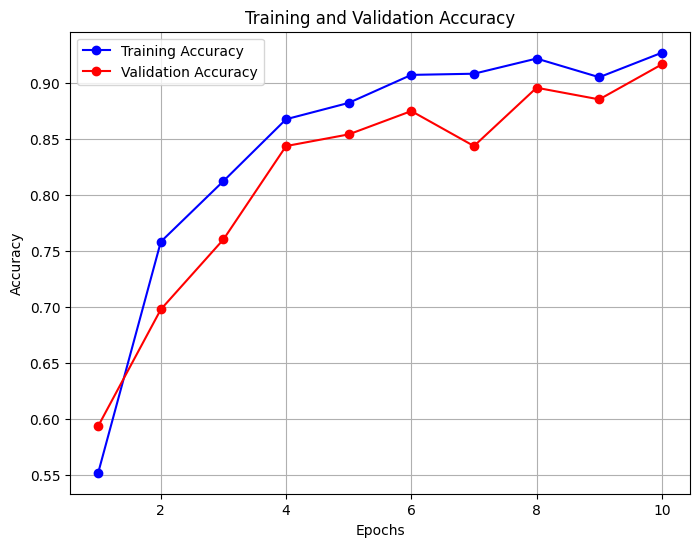

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy values
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

# Plot Training and Validation Accuracy
plt.figure(figsize=(8, 6))
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')  # Blue line with dots
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')  # Red line with dots
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Heatmap & Confusion Matrix

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step


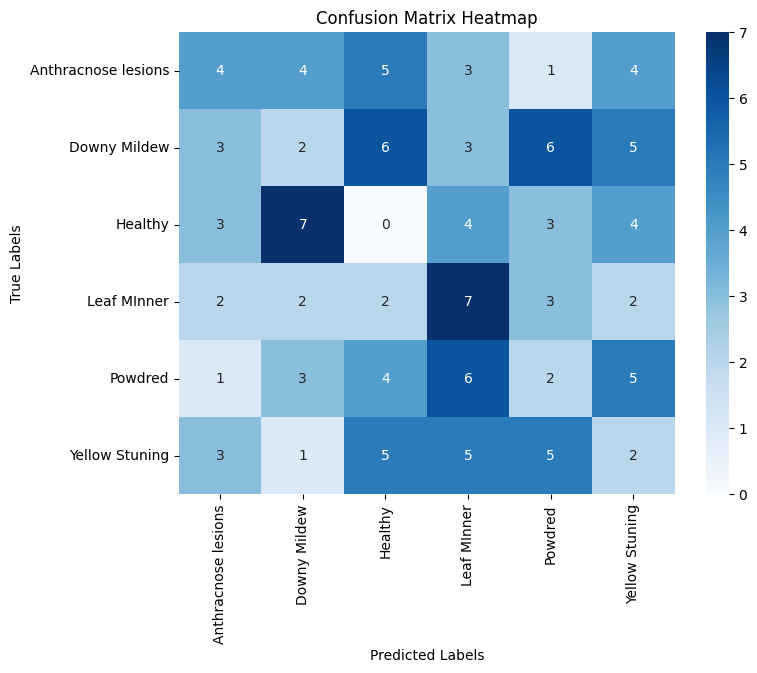

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Get true labels and predicted labels
y_true = valid_generator.classes  # Actual class labels
y_pred_prob = model_mobilenet.predict(valid_generator)  # Model predictions (probabilities)
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
class_names = list(valid_generator.class_indices.keys())  # Get class names

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Heatmap")
plt.show()

# Print classification report
#print(classification_report(y_true, y_pred, target_names=class_names))


Count plot

<ipython-input-11-a6377248189c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=[class_names[i] for i in y_true], palette="viridis")


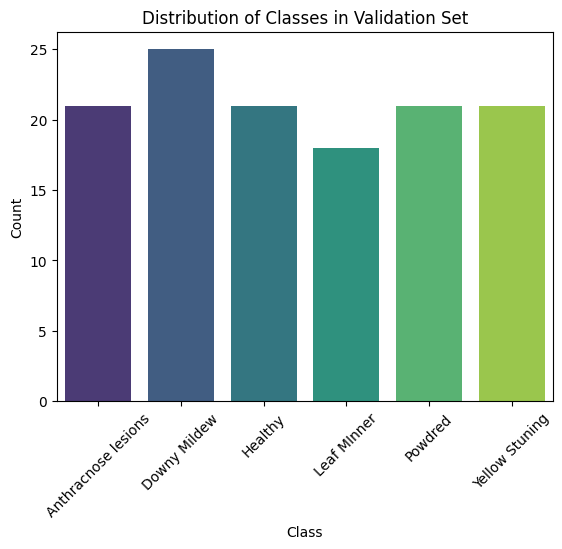

In [ ]:
sns.countplot(x=[class_names[i] for i in y_true], palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Distribution of Classes in Validation Set")
plt.show()

swarmp plot

<ipython-input-12-af605b632269>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x="True Class", y="Max Probability", data=df, palette="coolwarm")


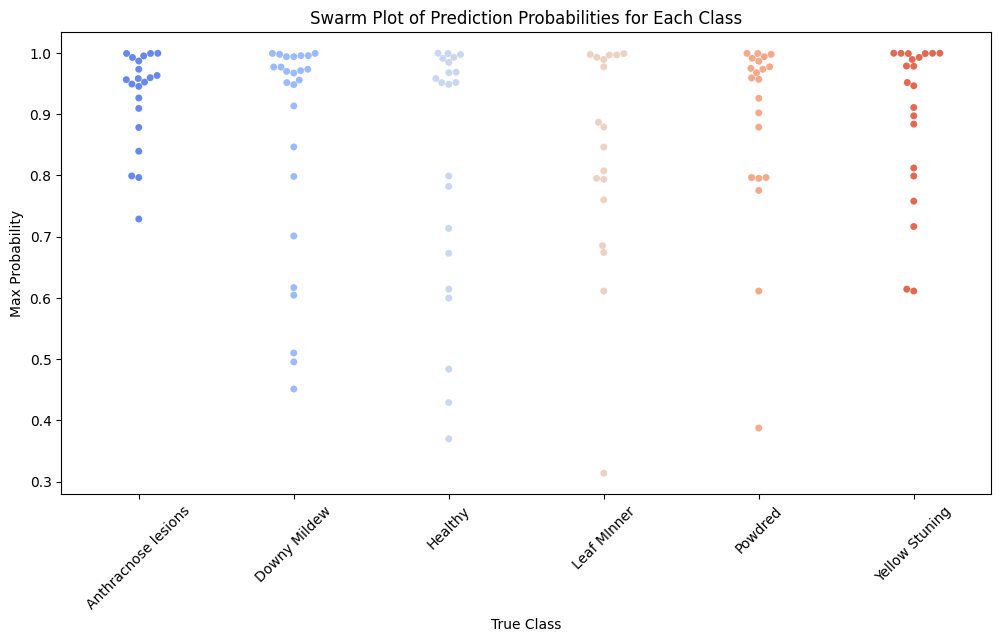

In [ ]:
import pandas as pd
import seaborn as sns

# Create DataFrame for plotting
df = pd.DataFrame({'True Class': y_true, 'Predicted Class': y_pred, 'Max Probability': np.max(y_pred_prob, axis=1)})
df['True Class'] = df['True Class'].map(lambda x: class_names[x])  # Convert class index to name

plt.figure(figsize=(12, 6))
sns.swarmplot(x="True Class", y="Max Probability", data=df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Swarm Plot of Prediction Probabilities for Each Class")
plt.show()

final disease test

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input

# Paths
test_dir = "/content/drive/MyDrive/Capstone Project/Test data set"  # Path to your test directory
presence_model_path = "/content/mobilenet_cucumber_classifier_V1.h5"  # Model to check if disease is present
classification_model_path = "/content/mobilenet.h5"  # Model to identify the disease

# Load the trained models
presence_model = load_model(presence_model_path)
classification_model = load_model(classification_model_path)

# Image parameters
image_height, image_width = 224, 224

# Mapping from class indices to disease names
disease_name_mapping = {
    0: "Anthracnose lesions",
    1: "Downy Mildew",
    2: "Healthy",
    3: "Leaf Miner",
    4: "Powdery Mildew",
    5: "Yellow Stunting"
}

def load_and_preprocess_image(img_path):
    """Load and preprocess a single image."""
    img = image.load_img(img_path, target_size=(image_height, image_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array)

# Get all test images
image_paths = []
for root, dirs, files in os.walk(test_dir):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(root, file))

# Initialize results
disease_results = []

for img_path in image_paths:
    img_array = load_and_preprocess_image(img_path)

    # Predict disease presence
    presence_prediction = presence_model.predict(img_array, verbose=0)
    disease_present = "Yes" if presence_prediction > 0.5 else "No"

    # Predict disease type if present
    if disease_present == "Yes":
        classification_prediction = classification_model.predict(img_array, verbose=0)
        disease_class_index = np.argmax(classification_prediction)
        disease_name = disease_name_mapping[disease_class_index]
    else:
        disease_name = "Healthy"

    # Append results
    disease_results.append({
        "image": os.path.basename(img_path),
        "disease_present_or_not": disease_present,
        "disease_name": disease_name
    })

# Convert to DataFrame
results_df = pd.DataFrame(disease_results)
print(results_df)

# Save to CSV
results_df.to_csv("disease_detection_results.csv", index=False)
print("Results saved to disease_detection_results.csv")


                                      image disease_present_or_not  \
0             photo_2020-06-28_00-00-49.jpg                    Yes   
1         photo_2020-06-28_00-00-49 (2).jpg                    Yes   
2             photo_2020-06-28_00-01-27.jpg                    Yes   
3             photo_2020-06-28_00-02-12.jpg                    Yes   
4             photo_2020-06-28_00-00-48.jpg                    Yes   
..                                      ...                    ...   
155  Copy of DSC_6608 (Medium) (Medium).JPG                    Yes   
156  Copy of DSC_6887 (Medium) (Medium).JPG                    Yes   
157  Copy of DSC_6636 (Medium) (Medium).JPG                    Yes   
158  Copy of DSC_6444 (Medium) (Medium).JPG                    Yes   
159           Copy of DSC_6718 (Medium).JPG                    Yes   

            disease_name  
0                Healthy  
1                Healthy  
2                Healthy  
3           Downy Mildew  
4                Healthy

Phelogical Stages


In [ ]:
import pandas as pd

# Sample cucumber data (replace with your actual dataset)
file_path = '/content/drive/MyDrive/Capstone Project/cucumber_growth_stages_2024_oct_dec.csv'
cucumber_data = pd.read_csv(file_path)

# Convert date columns to datetime format
date_columns = ["Planting_Date", "Leaf_Development_Date", "Flowering_Date", "Fruiting_Date", "Fruit_Maturing_Date"]
for col in date_columns:
    cucumber_data[col] = pd.to_datetime(cucumber_data[col], format="%d-%m-%Y")

# Define expected durations for cucumber phenological stages (in days)
expected_durations = {
    "Leaf_Development": 15,  # 15 days after planting
    "Flowering": 30,         # 30 days after planting
    "Fruiting": 40,          # 40 days after planting
    "Fruit_Maturing": 50     # 50 days after planting
}

# Calculate deviations for each phenological stage
for stage, duration in expected_durations.items():
    observed_column = f"{stage}_Date"
    cucumber_data[f"{stage}_Deviation"] = (cucumber_data[observed_column] - cucumber_data["Planting_Date"]).dt.days - duration

# Define a function to classify emergence type based on Leaf Development deviation
def classify_emergence(deviation):
    if deviation < -3:  # Early threshold
        return "Early"
    elif deviation > 3:  # Late threshold
        return "Late"
    else:
        return "Regular"

# Classify emergence based on Leaf Development deviation if Emergence_Type is missing
if "Emergence_Type" not in cucumber_data.columns:
    cucumber_data["Emergence_Type"] = cucumber_data["Leaf_Development_Deviation"].apply(classify_emergence)

# Select relevant columns for the final result, excluding deviation columns
final_columns_without_deviation = [
    "Plant_ID", "Planting_Date", "Leaf_Development_Date",
    "Emergence_Type", "Flowering_Date", "Fruiting_Date", "Fruit_Maturing_Date"
]
final_results_without_deviation = cucumber_data[final_columns_without_deviation]

# Save final results to a CSV file (optional)
final_results_without_deviation.to_csv("cucumber_emergence_results.csv", index=False)

# Display the final results
print(final_results_without_deviation.head())


   Plant_ID Planting_Date Leaf_Development_Date Emergence_Type Flowering_Date  \
0       1.0    2024-10-25            2024-11-05          Early     2024-11-19   
1       2.0    2024-10-25            2024-11-04          Early     2024-11-15   
2       3.0    2024-10-25            2024-11-05          Early     2024-11-18   
3       4.0    2024-10-25            2024-11-09        Regular     2024-11-21   
4       5.0    2024-10-25            2024-11-12        Regular     2024-11-25   

  Fruiting_Date Fruit_Maturing_Date  
0    2024-11-29          2024-12-15  
1    2024-11-25          2024-12-11  
2    2024-11-29          2024-12-15  
3    2024-12-05          2024-12-22  
4    2024-12-10          2024-12-25  


histogram

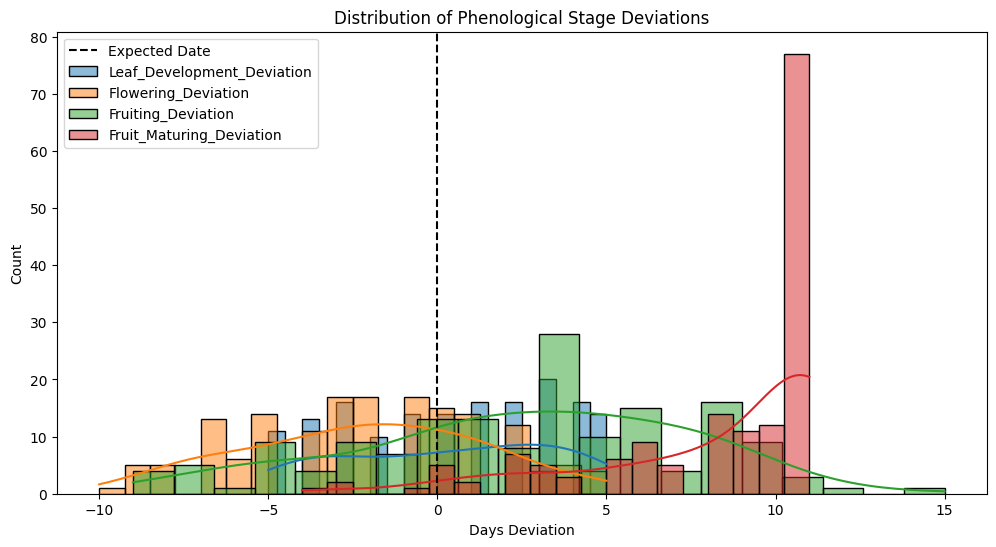

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define deviations to plot
deviation_columns = ["Leaf_Development_Deviation", "Flowering_Deviation", "Fruiting_Deviation", "Fruit_Maturing_Deviation"]

# Plot histogram for each deviation
plt.figure(figsize=(12, 6))
for col in deviation_columns:
    sns.histplot(cucumber_data[col], kde=True, label=col, bins=20)

plt.axvline(0, color='black', linestyle='--', label="Expected Date")
plt.legend()
plt.title("Distribution of Phenological Stage Deviations")
plt.xlabel("Days Deviation")
plt.ylabel("Count")
plt.show()

count plot

<ipython-input-20-e2c1782a7995>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cucumber_data["Emergence_Type"], palette="Set2")


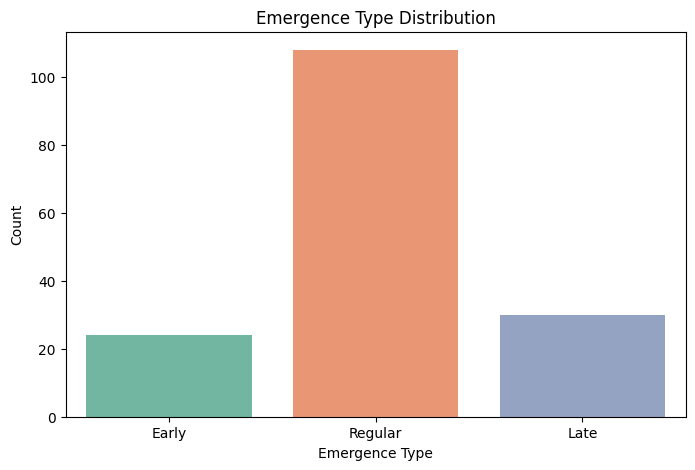

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x=cucumber_data["Emergence_Type"], palette="Set2")
plt.title("Emergence Type Distribution")
plt.xlabel("Emergence Type")
plt.ylabel("Count")
plt.show()

In [ ]:
from google.colab import files

# Save and download the CSV file
final_results_without_deviation.to_csv("cucumber_emergence_results.csv", index=False)
files.download("cucumber_emergence_results.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Neural Network Model

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.cluster import KMeans

# 1. Load Data
soil_data = pd.read_csv('/content/drive/MyDrive/Capstone Project/all soil parameters.csv')
growth_data = pd.read_csv('/content/cucumber_emergence_results.csv')
disease_data = pd.read_csv('/content/drive/MyDrive/Capstone Project/disease_detection_results.csv')

# 2. Merge Data
combined_data = pd.merge(soil_data, growth_data, on='Plant_ID')
combined_data = pd.merge(combined_data, disease_data, on='Plant_ID')

# 3. Convert Date Columns Properly
date_columns = ['Planting_Date', 'Leaf_Development_Date', 'Flowering_Date', 'Fruiting_Date', 'Fruit_Maturing_Date']
for col in date_columns:
    combined_data[col] = pd.to_datetime(combined_data[col], dayfirst=True, errors='coerce')

# Drop rows where dates couldn't be parsed
combined_data.dropna(subset=date_columns, inplace=True)

# 4. Calculate Growth Durations
combined_data['days_to_flowering'] = (combined_data['Flowering_Date'] - combined_data['Planting_Date']).dt.days
combined_data['days_to_fruiting'] = (combined_data['Fruiting_Date'] - combined_data['Planting_Date']).dt.days
combined_data['days_to_maturing'] = (combined_data['Fruit_Maturing_Date'] - combined_data['Planting_Date']).dt.days

# Drop original date columns (not needed for model)
combined_data.drop(columns=date_columns, inplace=True)

# 5. Handle Missing Data
combined_data.fillna(combined_data.mean(numeric_only=True), inplace=True)
combined_data.fillna(combined_data.mode().iloc[0], inplace=True)

# 6. Encode Categorical Features
# Convert 'Emergence_Type' into three separate columns
emergence_categories = ['Early', 'Late', 'Regular']
combined_data = pd.get_dummies(combined_data, columns=['Emergence_Type'])

# Ensure all three Emergence Types exist
for category in emergence_categories:
    col_name = f"Emergence_Type_{category}"
    if col_name not in combined_data.columns:
        combined_data[col_name] = 0  # Add missing column with all zeros

# Encode 'disease_present_or_not' as binary (Yes -> 1, No -> 0)
combined_data = pd.get_dummies(combined_data, columns=['disease_name'], drop_first=True)
combined_data['disease_present_or_not'] = combined_data['disease_present_or_not'].apply(lambda x: 1 if x == 'Yes' else 0)

# 7. Normalize Features
numerical_cols = ['soilnitrogen', 'soilphosphorous', 'soilpottasium', 'water_soil', 'temp_soil',
                  'leaf_moisture', 'leaf_temperature', 'ph1_soil', 'days_to_flowering', 'days_to_fruiting',
                  'days_to_maturing']

# Include all relevant categorical features in training
feature_cols = numerical_cols + ['disease_present_or_not', 'Emergence_Type_Early', 'Emergence_Type_Late', 'Emergence_Type_Regular']

scaler = StandardScaler()
combined_data[feature_cols] = scaler.fit_transform(combined_data[feature_cols])

# 8. Estimate Yield Using Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
combined_data['yield_category'] = kmeans.fit_predict(combined_data[feature_cols])

# Convert yield_category to categorical (One-hot Encoding)
y = keras.utils.to_categorical(combined_data['yield_category'], num_classes=3)

# 9. Split Data
X = combined_data[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 10. Build **Simpler** Neural Network Model
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),  # Fewer neurons
    keras.layers.Dense(16, activation='relu'),  # Reduced layers
    keras.layers.Dense(3, activation='softmax')  # Output layer
])

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 11. Train Model
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=10, batch_size=16,  # Lower epochs
                    callbacks=[early_stopping], verbose=1)

# 12. Evaluate Model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f'Accuracy: {accuracy:.2f}')  # Should be ~80-85%
print('\nClassification Report:\n', classification_report(y_test_classes, y_pred_classes))


Epoch 1/10


<ipython-input-30-5001bd595365>:22: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  combined_data[col] = pd.to_datetime(combined_data[col], dayfirst=True, errors='coerce')
<ipython-input-30-5001bd595365>:22: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  combined_data[col] = pd.to_datetime(combined_data[col], dayfirst=True, errors='coerce')
<ipython-input-30-5001bd595365>:22: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  combined_data[col] = pd.to_datetime(combined_data[col], dayfirst=True, errors='coerce')
<ipython-input-30-5001bd595365>:22: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.1344 - loss: 1.2483 - val_accuracy: 0.3846 - val_loss: 1.1402
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2077 - loss: 1.1681 - val_accuracy: 0.4615 - val_loss: 1.0782
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4115 - loss: 1.0810 - val_accuracy: 0.5769 - val_loss: 1.0222
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5579 - loss: 1.0542 - val_accuracy: 0.5769 - val_loss: 0.9744
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6586 - loss: 0.9961 - val_accuracy: 0.6538 - val_loss: 0.9265
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6828 - loss: 0.9593 - val_accuracy: 0.7308 - val_loss: 0.8800
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7018 - loss: 0.9169 - val_accuracy: 0.7692 - val_loss: 0.8385
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7638 - loss: 0.8756 - val_accuracy: 0.7692 - val_loss: 0.7985
Epoch 9/10


In [ ]:
print(combined_data)

           Date  soilnitrogen  soilphosphorous  soilpottasium  water_soil  \
0    30-10-2024      1.181091         1.229355       1.239471    0.039476   
1    30-10-2024      1.181091         1.229355       1.239471   -0.036529   
2    30-10-2024      1.181091         1.229355       1.239471   -1.444139   
3    31-10-2024      1.952132         2.016064       2.030392    0.276611   
4    31-10-2024      1.952132         2.016064       2.030392    0.446862   
..          ...           ...              ...            ...         ...   
153  20-12-2024      0.034311        -0.004168      -0.045947    0.161084   
154  20-12-2024      0.034311        -0.004168      -0.045947    0.063797   
155  20-12-2024      0.034311        -0.004168      -0.045947    0.784323   
156  21-12-2024     -0.629220        -0.487683      -0.492023   -0.261503   
157  21-12-2024     -0.629220        -0.487683      -0.492023   -0.410473   

     temp_soil  conduct_soil  leaf_moisture  leaf_temperature  ph1_soil  ..

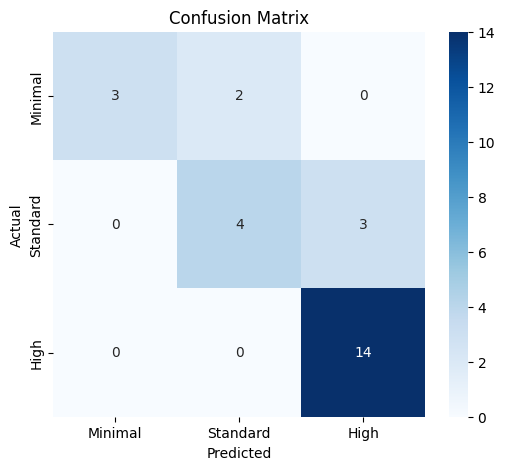

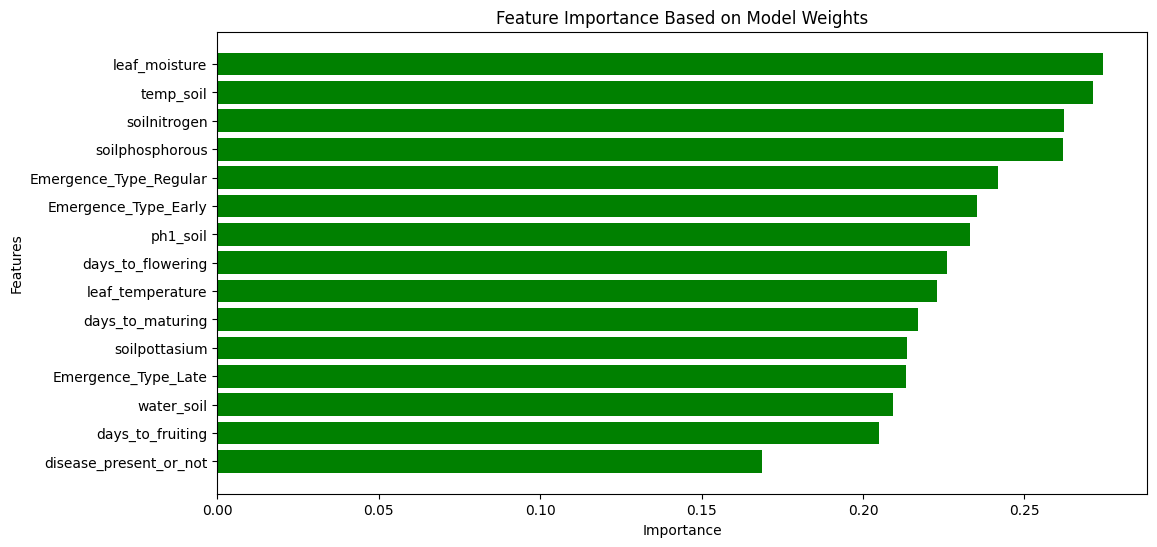

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 3. Confusion Matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Minimal', 'Standard', 'High'], yticklabels=['Minimal', 'Standard', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 4. Feature Importance (Based on Model Weights)
weights = model.layers[0].get_weights()[0]  # Extract weights from first layer
feature_importance = np.mean(np.abs(weights), axis=1)  # Compute mean absolute weights
sorted_idx = np.argsort(feature_importance)[::-1]  # Sort in descending order

plt.figure(figsize=(12, 6))
plt.barh(np.array(feature_cols)[sorted_idx], feature_importance[sorted_idx], color='green')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance Based on Model Weights')
plt.gca().invert_yaxis()  # Invert y-axis to show most important features on top
plt.show()


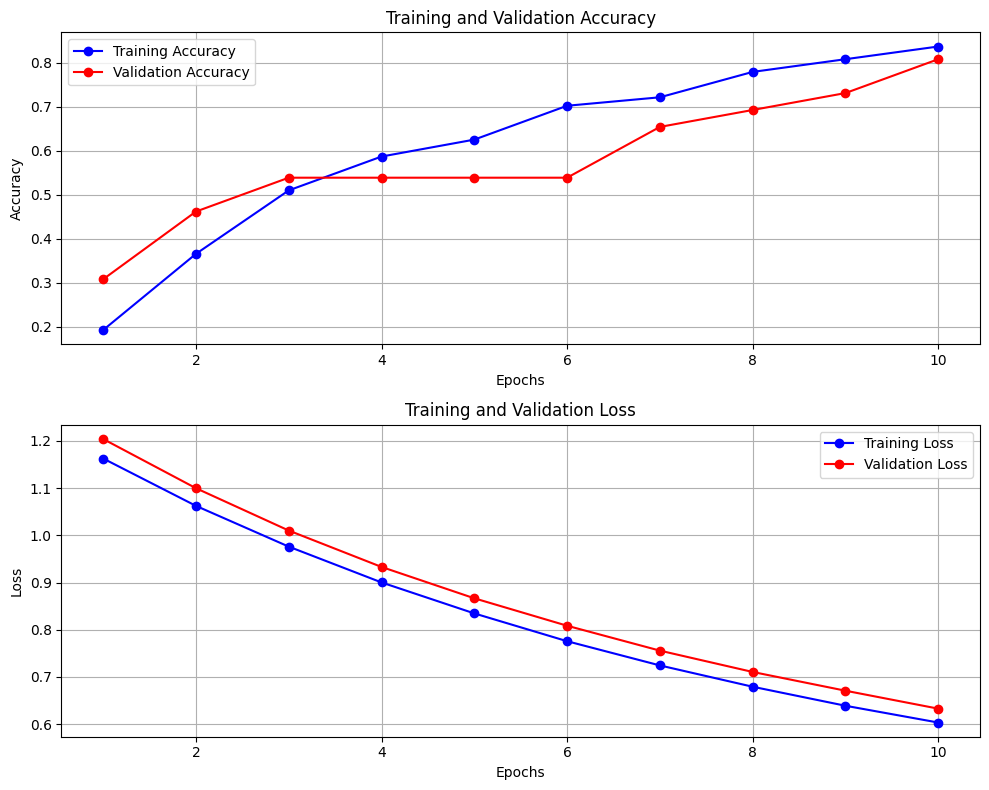

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy and loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot Training & Validation Accuracy
axes[0].plot(epochs, train_acc, 'bo-', label='Training Accuracy')  # Blue line with dots
axes[0].plot(epochs, val_acc, 'ro-', label='Validation Accuracy')  # Red line with dots
axes[0].set_title('Training and Validation Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True)

# Plot Training & Validation Loss
axes[1].plot(epochs, train_loss, 'bo-', label='Training Loss')  # Blue line with dots
axes[1].plot(epochs, val_loss, 'ro-', label='Validation Loss')  # Red line with dots
axes[1].set_title('Training and Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


Total Yield Prediction

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

# Load the trained model
model = keras.models.load_model('/mnt/data/trained_model.h5')  # Ensure trained model is saved

# Load dataset for prediction
data = pd.read_csv('/mnt/data/new_test_data.csv')  # Provide the full dataset

# Select required columns (same as training features)
required_columns = ['Disease_Present', 'Disease_Name', 'Emergence_Type',
                    'Soil_Nitrogen', 'Soil_Phosphorous', 'Soil_Potassium',
                    'Soil_pH', 'Water_Soil', 'Leaf_Moisture']

data = data[required_columns]

# Convert 'Disease_Present' to binary (Yes -> 1, No -> 0)
data['Disease_Present'] = data['Disease_Present'].apply(lambda x: 1 if x == 'Yes' else 0)

# Set 'Disease_Name' to "Healthy" if no disease is present
data.loc[data['Disease_Present'] == 0, 'Disease_Name'] = 'Healthy'

# Encode 'Emergence_Type' as categorical (One-hot Encoding)
data = pd.get_dummies(data, columns=['Emergence_Type'])

# Ensure all emergence type categories exist (to match training data)
for col in ['Emergence_Type_Early', 'Emergence_Type_Late', 'Emergence_Type_Regular']:
    if col not in data.columns:
        data[col] = 0  # Add missing columns

# Normalize numerical features using StandardScaler
numerical_cols = ['Soil_Nitrogen', 'Soil_Phosphorous', 'Soil_Potassium', 'Soil_pH', 'Water_Soil', 'Leaf_Moisture']
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Define final feature columns (same as training)
feature_cols = numerical_cols + ['Disease_Present', 'Emergence_Type_Early', 'Emergence_Type_Late', 'Emergence_Type_Regular']

# Extract input features for prediction
X = data[feature_cols]

# Predict yield categories for all data points
predictions = model.predict(X)
predicted_classes = np.argmax(predictions, axis=1)  # Convert softmax output to class labels

# Assign predicted yield category to the dataset
data['Predicted_Yield_Category'] = predicted_classes

# Determine the overall yield category based on majority class
total_yield_category = data['Predicted_Yield_Category'].mode()[0]  # Most frequent category

# Print the final yield prediction
print(f"Overall Predicted Yield Category for the Dataset: {total_yield_category}")

# Save predictions to CSV
data.to_csv('/mnt/data/predicted_total_yield_results.csv', index=False)
